In [1]:
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np

In [2]:
df = pd.read_csv('dataItem')
df = df[['concat','Category','Item']]
df = df.head(500000)

In [3]:
df['Category'].value_counts()

Deskside                101965
Access Management        72995
Application              46047
Security                 32385
Data Center              24981
Operations               14305
Network                  13355
Radio                    11232
Process Control           9348
Employee Status           7854
Voice Communication       2961
Cloud                     2708
Service Introduction       410
Security Center              9
Desktop                      1
Name: Category, dtype: int64

In [4]:
df = df[df['Category'] == 'Application']

In [5]:
df = df.drop(columns=['Category'],axis=1)

In [6]:
df

,concat,Item
0,Add Filter in Event Grid FMFormsNAProdEvtGrd01...,Other
8,edwappower down edwappower down,EDW Business Objects
9,Folder mounting for DailyRpt ETL Need to chec...,EDW Business Objects
20,[SAP BO] Please publish FIN AP report to produ...,EDW Business Objects
33,Follow Up - Vendor Web Form (PHX & PTFI).IT.CM...,Custom
...,...,...
340509,Intune: Create a profile to allow Widgets fro...,AirWatch
340514,Issue with a Prepaid Purchase order The Prepai...,SAP Supply Chain
340517,Please resume the following Jobs: DFIN_RYAN_GD...,SAP Basis
340518,AirWatch Maintenance The Workspace ONE UEM CN2...,AirWatch


In [7]:
pd.set_option('display.max_rows', 50)

In [8]:
#Distribution of tickets between the Items of the Category selected
aux = pd.DataFrame(df['Item'].value_counts()).sort_values(by='Item', ascending=False)

#Cumulative percent column
aux['cum_percent'] = 100 * (aux['Item'].cumsum()/aux['Item'].sum())

#Filter just the Items that represent the X% of the tickets in the category
aux = aux[aux['cum_percent'] < 95]
aux = aux.reset_index()
aux

,index,Item,cum_percent
0,Other,11880,25.799726
1,EDW Business Objects,6650,40.241492
2,Custom,4632,50.300780
3,CAS - Contract Administration System,2195,55.067648
4,SAP,1927,59.252503
5,Biztalk,1594,62.714183
6,SCCM,1457,65.878342
7,Mailbox,1423,68.968662
8,PI,1375,71.954742
9,SAP Basis,1328,74.838752


In [9]:
n= 800

df_final = pd.DataFrame(columns = ['concat','Item'])

for i in aux['index']:
    df_aux = df[df['Item'] == i][0:n]
    df_final = pd.concat([df_final,df_aux],ignore_index=True)


df = df_final
df

,concat,Item
0,Add Filter in Event Grid FMFormsNAProdEvtGrd01...,Other
1,BASWARE I need access to all plants in Basware...,Other
2,When I try to logon to the computer it says my...,Other
3,NO actualiza la plataforma TROI Se requiere l...,Other
4,La interfaz de usuario de C2 TROI no es funcio...,Other
...,...,...
16189,Skipped coil in StarLims Had an issue with the...,Star LIMS
16190,Need to verify Raymond Vidales has access to S...,Star LIMS
16191,StarLims is Missing a Coil StarLims is missing...,Star LIMS
16192,No longer able to log in to starlims since my ...,Star LIMS


In [10]:
df['Item'].value_counts()

SAP Basis                               800
Microsoft 365                           800
Biztalk                                 800
ATA - BCOMM - Time & Attendance         800
PI                                      800
SAP                                     800
Mailbox                                 800
Custom                                  800
EDW Business Objects                    800
Big Data                                800
SharePoint                              800
Other                                   800
SCCM                                    800
CAS - Contract Administration System    800
Call Center                             779
Security/Operational Video              684
SAP HR                                  619
SAP LSO                                 501
Snowflake                               487
SAP Supply Chain                        456
Endpoint Management                     394
Connected Mine                          378
Packaging                       

In [11]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(df[['concat']], df[['Item']])

In [12]:
df = pd.DataFrame()
df['concat'] = X_over['concat']
df['Item'] = y_over['Item']

In [13]:
df

,concat,Item
0,Add Filter in Event Grid FMFormsNAProdEvtGrd01...,Other
1,BASWARE I need access to all plants in Basware...,Other
2,When I try to logon to the computer it says my...,Other
3,NO actualiza la plataforma TROI Se requiere l...,Other
4,La interfaz de usuario de C2 TROI no es funcio...,Other
...,...,...
19195,"Starlims issue, analytes absent from analysis ...",Star LIMS
19196,Incorrect Hierarchy change - please remove and...,Star LIMS
19197,End Users at Anylitical Lab in Miami having ne...,Star LIMS
19198,We need all of our Moly Shipments to stop addi...,Star LIMS


In [14]:
df.Item.value_counts()

SAP Basis                               800
Security/Operational Video              800
Biztalk                                 800
Connected Mine                          800
ATA - BCOMM - Time & Attendance         800
PI                                      800
SAP HR                                  800
SAP LSO                                 800
SAP                                     800
Mailbox                                 800
Custom                                  800
Call Center                             800
EDW Business Objects                    800
Snowflake                               800
Microsoft 365                           800
Endpoint Management                     800
SAP Supply Chain                        800
Big Data                                800
Star LIMS                               800
SharePoint                              800
Other                                   800
SCCM                                    800
Packaging                       

In [15]:
#Stopwords corpus
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

#Preprocessing function
numbers = ['0','1','2','3','4','5','6','7','8','9']
def prepare_text(text):
    tokens = text
    tokens = [token for token in tokens if len(token) > 2] #Remove words with less than 2 characters
    tokens = [token for token in tokens if token not in en_stop] #Remove stopwords
    tokens = [token for token in tokens if not any(number in token for number in numbers)]  #Remove numbers   
    tokens = [token.replace('[^\w\s]','') for token in tokens] #Remove punctuation
    tokens = [token.replace('_','') for token in tokens] #Remove punctuation
    return tokens

#tokens to str
def tostr(text):
    str1 = "" 
    for word in text: 
        str1 += word.lower()
        str1 += ' '
    return str1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mateio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenize to apply preprocessing

In [16]:
df['tokenized_text'] = df['concat'].apply(word_tokenize) 

Preprocessing

In [17]:
df['prep_text'] = df['tokenized_text'].apply(prepare_text)

Changing to str again

In [18]:
df['prep_text'] = df['prep_text'].apply(tostr)

Drop useless columnss

In [19]:
df['Texto'] = df['prep_text']
df = df.drop(columns=['prep_text','tokenized_text','concat'],axis=1)
df.head(3)

,Item,Texto
0,Other,add filter event grid need add filter event gr...
1,Other,basware need access plants basware please mimi...
2,Other,when try logon computer says account suspended...


Filtering Service Introduction because there are not much observations

Target distribution:

In [20]:
df['Item'].value_counts()

SAP Basis                               800
Security/Operational Video              800
Biztalk                                 800
Connected Mine                          800
ATA - BCOMM - Time & Attendance         800
PI                                      800
SAP HR                                  800
SAP LSO                                 800
SAP                                     800
Mailbox                                 800
Custom                                  800
Call Center                             800
EDW Business Objects                    800
Snowflake                               800
Microsoft 365                           800
Endpoint Management                     800
SAP Supply Chain                        800
Big Data                                800
Star LIMS                               800
SharePoint                              800
Other                                   800
SCCM                                    800
Packaging                       

Vectorizing: unigrams and bigrams, max features beause the RAM limitation, and strip accents

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),max_features=15000,strip_accents='ascii')
X = vectorizer.fit_transform(df['Texto']).toarray()
X = pd.DataFrame(X)
X.columns = vectorizer.get_feature_names()
X

,aadgroup,aao,aaron,abap,abapdebug,abapdebug false,abbreviation,abbreviation ele,abbreviation fpm,abbreviation fpo,...,zinc,zip,zip file,zmmrpick,zone,zoom,zoom software,zparkman,zparkman fmi,ztsct
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merge the X array with the category to obtain the final dataframe

In [22]:
# Finally merging all features with above bag of words sin texto porque ya fue procesada en el BoW
df_train = pd.merge(X,df.drop(columns=['Texto']),left_index=True, right_index=True)
df_train.head(3)

,aadgroup,aao,aaron,abap,abapdebug,abapdebug false,abbreviation,abbreviation ele,abbreviation fpm,abbreviation fpo,...,zip,zip file,zmmrpick,zone,zoom,zoom software,zparkman,zparkman fmi,ztsct,Item
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other


Train test split, stratified

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_train.drop(columns='Item'),df_train['Item'],test_size=0.2,random_state=123, stratify=df_train['Item'])

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15360, 15000)
(3840, 15000)
(15360,)
(3840,)


### Modelling: Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

Solver liblinear its faster, class_weight balanced not needed in this case because the dataset was balanced. C=0.35 was the best regularization tuned

In [26]:
Log_Ridge=LogisticRegression(penalty='l2', max_iter=10000, solver='liblinear', tol=0.0001, class_weight='balanced', C=0.35)

In [27]:
Log_Ridge.fit(X_train, y_train)

LogisticRegression(C=0.35, class_weight='balanced', max_iter=10000,
                   solver='liblinear')

In [28]:
Log_Ridge.score(X_test, y_test)

0.8872395833333333

Saving the model and vectorizer

In [29]:
import pickle

In [30]:
pickle.dump(Log_Ridge, open('ModelItemSecurity', 'wb'))

In [31]:
pickle.dump(vectorizer, open('VectorizerItemSecurity', 'wb'))

Learning curves: what happens if we add more observations

In [32]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

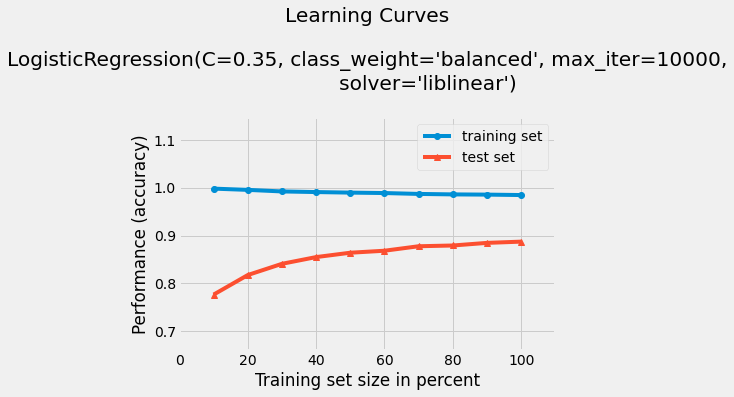

In [33]:
plot_learning_curves(X_train, y_train, X_test, y_test, Log_Ridge, scoring='accuracy')
plt.show()

Test set target distribution

In [34]:
from collections import Counter
Counter(y_test)

Counter({'Big Data': 160,
         'Custom': 160,
         'Biztalk': 160,
         'CAS - Contract Administration System': 160,
         'Star LIMS': 160,
         'SAP Supply Chain': 160,
         'PI': 160,
         'Security/Operational Video': 160,
         'SAP Basis': 160,
         'Endpoint Management': 160,
         'SharePoint': 160,
         'SAP LSO': 160,
         'Snowflake': 160,
         'SAP HR': 160,
         'Mailbox': 160,
         'SAP': 160,
         'Other': 160,
         'Call Center': 160,
         'EDW Business Objects': 160,
         'Connected Mine': 160,
         'Microsoft 365': 160,
         'ATA - BCOMM - Time & Attendance': 160,
         'Packaging': 160,
         'SCCM': 160})

Confusion matrix, values and percentage

In [35]:
y_pred = Log_Ridge.predict(X_test)

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Heatmap'),
 Text(0.5, 69.0, 'Predicted Label'),
 Text(113.99999999999999, 0.5, 'True Label')]

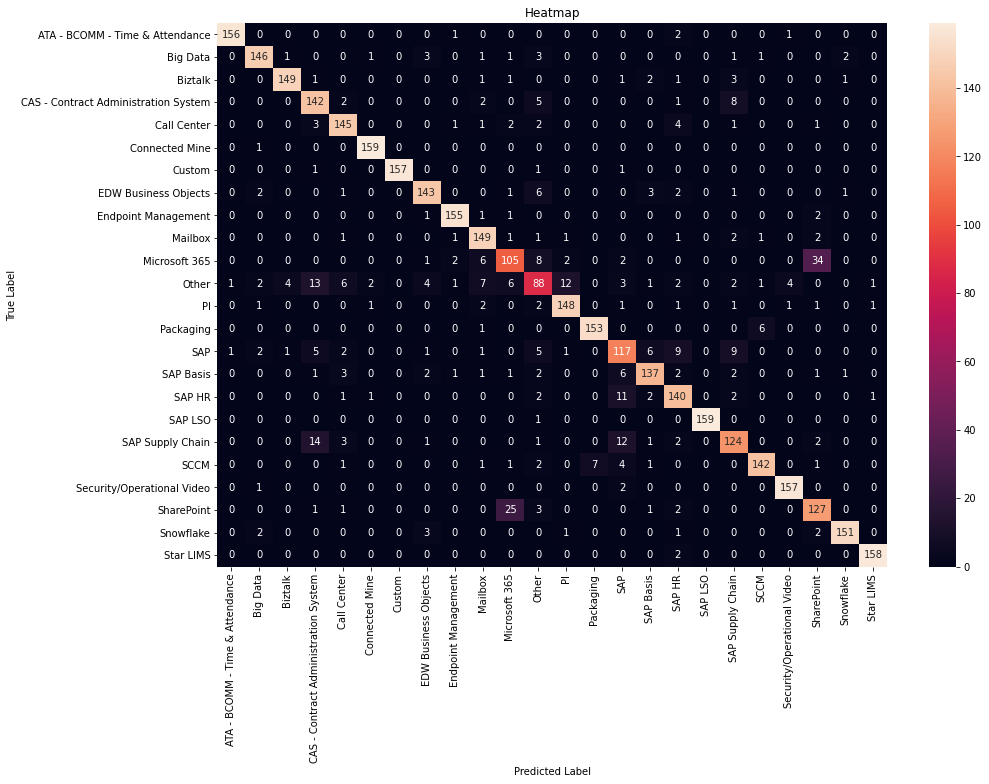

In [37]:
cm_labels = np.unique(y_test)
cm_array = confusion_matrix(y_test,y_pred)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_array_df, annot=True, fmt='g', xticklabels=True, yticklabels=True)
ax.set(title="Heatmap",
      xlabel="Predicted Label",
      ylabel="True Label")

[Text(0.5, 1.0, 'Heatmap'),
 Text(0.5, 69.0, 'Predicted Label'),
 Text(113.99999999999999, 0.5, 'True Label')]

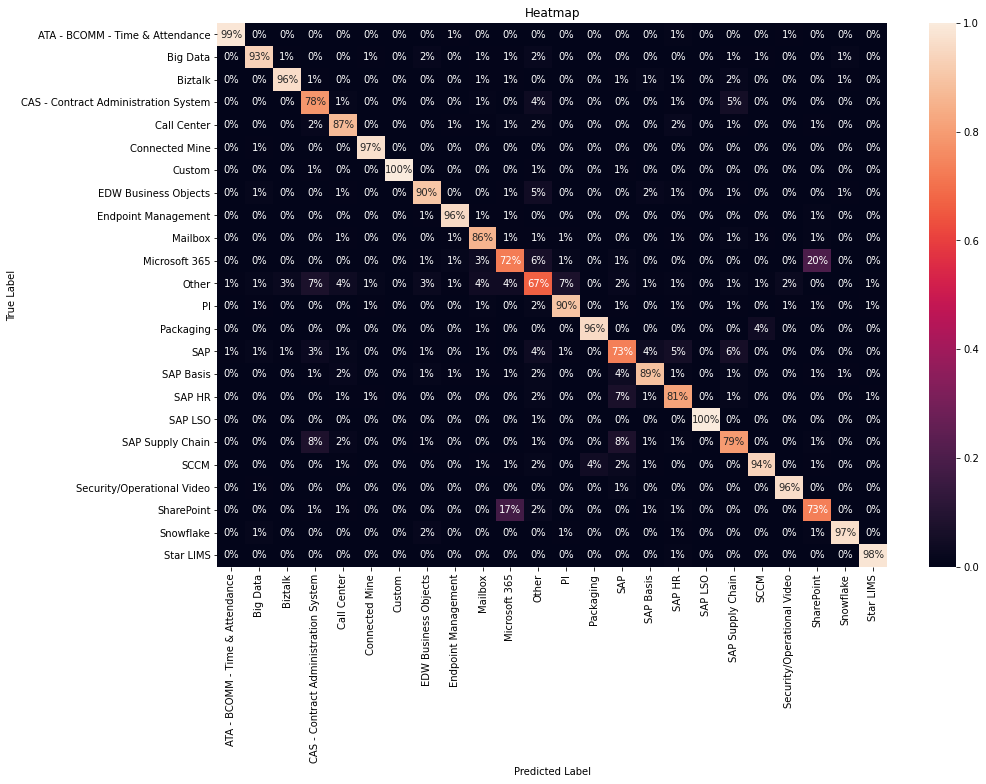

In [38]:
cm_labels = np.unique(y_test)

cm_array = confusion_matrix(y_test,y_pred)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_array_df/np.sum(cv_array_df), fmt='.0%', annot=True, xticklabels=True, yticklabels=True)
ax.set(title="Heatmap",
      xlabel="Predicted Label",
      ylabel="True Label")

Testing area

In [39]:
Test = 'Please update the mfa phone number of account .. 123 123asd'

In [40]:
Test = word_tokenize(Test)
Test = prepare_text(Test)
Test = tostr(Test)
TestExplainer = Test  #Save Test in this step to use it after in Explainer
Test = vectorizer.transform([Test])
Test

<1x15000 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [41]:
Log_Ridge.predict(Test)

array(['Other'], dtype=object)

Probabilities obtained for the predicted result:

In [42]:
cm_labels = np.unique(y_test)
np.save('labelsSecurity',cm_labels)

In [43]:
np.load('labelsSecurity.npy',allow_pickle=True)

array(['ATA - BCOMM - Time & Attendance', 'Big Data', 'Biztalk',
       'CAS - Contract Administration System', 'Call Center',
       'Connected Mine', 'Custom', 'EDW Business Objects',
       'Endpoint Management', 'Mailbox', 'Microsoft 365', 'Other', 'PI',
       'Packaging', 'SAP', 'SAP Basis', 'SAP HR', 'SAP LSO',
       'SAP Supply Chain', 'SCCM', 'Security/Operational Video',
       'SharePoint', 'Snowflake', 'Star LIMS'], dtype=object)

In [44]:
prob = Log_Ridge.predict_proba(Test)
probas = pd.DataFrame()
probas['Type'] = cm_labels
probas['Prob'] = prob[0]
probas.sort_values('Prob', ascending=False)[0:].style.highlight_max(color = 'lightgreen', axis = 0)

,Type,Prob
11,Other,0.155086
18,SAP Supply Chain,0.152903
9,Mailbox,0.105729
4,Call Center,0.055162
7,EDW Business Objects,0.049834
1,Big Data,0.046121
14,SAP,0.044722
16,SAP HR,0.042367
3,CAS - Contract Administration System,0.041079
15,SAP Basis,0.038882


Explainer: what feature weights the most for each class

In [45]:
import eli5
explanation = eli5.show_weights(Log_Ridge, vec=vectorizer, top=20)

In [46]:
explanation

Explanation: for a particular observation, explain why the predicted value was what it was

In [47]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, Log_Ridge)

In [48]:
print(c.predict_proba(X_test[0:1]).round(3))

[[0.032 0.089 0.024 ... 0.046 0.012 0.029]
 [0.031 0.112 0.023 ... 0.045 0.011 0.029]
 [0.032 0.089 0.024 ... 0.045 0.012 0.028]
 ...
 [0.032 0.089 0.024 ... 0.046 0.012 0.029]
 [0.027 0.087 0.024 ... 0.064 0.012 0.028]
 [0.032 0.088 0.024 ... 0.046 0.012 0.029]]


In [49]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=np.unique(y_test))

In [50]:
exp = explainer.explain_instance(TestExplainer, c.predict_proba, num_features=10, top_labels=1)
print(exp.available_labels())

[11]


In [51]:
exp.show_in_notebook(text=True)

In [52]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)